In [4]:
!pip list

Package                Version
---------------------- -------------------
absl-py                0.12.0
astroid                2.4.2
astunparse             1.6.3
cachetools             4.2.1
certifi                2020.12.5
chardet                4.0.0
colorama               0.4.3
flatbuffers            1.12
gast                   0.3.3
google-auth            1.28.0
google-auth-oauthlib   0.4.4
google-pasta           0.2.0
grpcio                 1.32.0
h5py                   2.10.0
idna                   2.10
importlib-metadata     3.10.0
isort                  5.5.1
Keras-Preprocessing    1.1.2
lazy-object-proxy      1.4.3
Markdown               3.3.4
mccabe                 0.6.1
numpy                  1.19.5
oauthlib               3.1.0
opt-einsum             3.3.0
pip                    21.0.1
protobuf               3.15.7
pyasn1                 0.4.8
pyasn1-modules         0.2.8
pylint                 2.6.0
requests               2.25.1
requests-oauthlib      1.3.0
rsa             

In [1]:
import tensorflow as tf

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [2]:
print(tf.__version__)

1.14.0


In [3]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16202820419001545782]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from sklearn.model_selection import StratifiedKFold
from keras import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

Using TensorFlow backend.


In [4]:
train = pd.read_csv('c:/kaggle_data/mnist/train.csv')
test = pd.read_csv('c:/kaggle_data/mnist/test.csv')
sub = pd.read_csv('c:/kaggle_data/mnist/submission.csv')

# Data preprocessing & EDA
- digit: 가려진 숫자, 우리가 찾을 값
- letter: 숫자를 가리키는 알파벳

In [5]:
display(train,test,sub)

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


,id,digit
0,2049,0
1,2050,0
2,2051,0
3,2052,0
4,2053,0
...,...,...
20475,22524,0
20476,22525,0
20477,22526,0
20478,22527,0


In [6]:
# check the distribution of 'digit'
train['digit'].value_counts()

2    233
5    225
6    212
4    207
3    205
1    202
9    197
7    194
0    191
8    182
Name: digit, dtype: int64

In [7]:
# drop columns
train2 = train.drop(['id','digit','letter'],1)
test2 = test.drop(['id','letter'],1)

In [8]:
# convert pandas dataframe to numpy array
train2 = train2.values
test2 = test2.values

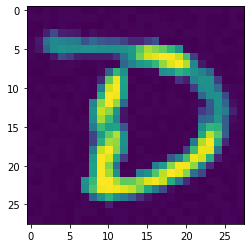

In [9]:
plt.imshow(train2[100].reshape(28,28))

In [10]:
train2 = train2.reshape(-1,28,28,1)
test2 = test2.reshape(-1,28,28,1)

In [11]:
# normalization
train2 = train2/255.
test2 = test2/255.

In [12]:
# image data generator * data augmentation
idg = ImageDataGenerator(height_shift_range = (-1,1), width_shift_range = (-1,1))
idg2 = ImageDataGenerator()

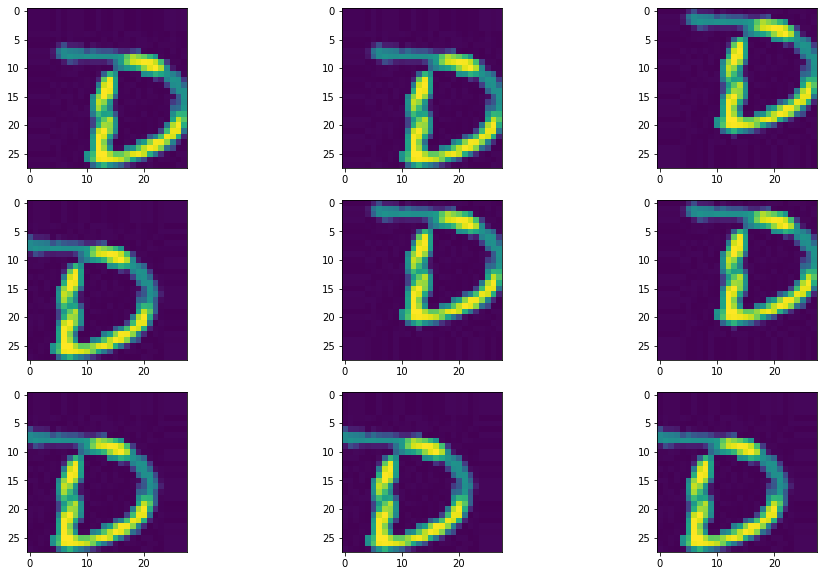

In [13]:
# show augmented image data
sample_data = train2[100].copy()
sample = expand_dims(sample_data,0)
sample_datagen = ImageDataGenerator(height_shift_range=(-3,3), width_shift_range=(3,-3))
sample_generator = sample_datagen.flow(sample, batch_size=1)

plt.figure(figsize=(16,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  sample_batch = sample_generator.next()
  sample_image = sample_batch[0]
  plt.imshow(sample_image.reshape(28,28))

# Validation

In [14]:
# cross validation
skf = StratifiedKFold(n_splits=40, random_state=42, shuffle=True)

# Modeling

In [15]:
%%time
# patience 만큼의 epoch에도 벗어나지 못하면 callback 호출
# verbose
# factor: 학습률을 1/2로 줄인다 patience 만큼의 epoch에도 벗어나지 못하면 callback 호출
reLR = ReduceLROnPlateau(monitor='accuracy',patience=100, verbose=1, factor=0.5)
es = EarlyStopping(patience=160, verbose=1)

val_loss_min = []
result=0
nth = 0

from tqdm import tqdm
for train_idx, valid_idx in tqdm(skf.split(train2,train['digit'])):
    mc = ModelCheckpoint('best_cvision.h5', save_best_only=True, verbose=1)

    x_train = train2[train_idx]
    x_valid = train2[valid_idx]
    y_train = train['digit'][train_idx]
    y_valid = train['digit'][valid_idx]

    train_generator = idg.flow(x_train, y_train, batch_size=8)
    valid_generator = idg2.flow(x_valid, y_valid)
    test_generator = idg2.flow(test2,shuffle=False)

    model = Sequential()
    model.add(Conv2D(16,(3,3), activation='relu', input_shape=(28,28,1),padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,(5,5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(5,5),activation='relu',padding='same')) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    # model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.002,epsilon=None), metrics=['acc'])
    model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.002,epsilon=None), metrics=['acc'])

    # learning_history = model.fit_generator(train_generator, 
    #                                        epochs=2000, 
    #                                        validation_data=valid_generator,
    #                                        callbacks=[es,mc,reLR])

    learning_history = model.fit(train_generator, 
                                         epochs=2000, 
                                         validation_data=valid_generator,
                                         callbacks=[es,mc,reLR])

    # predict
    model.load_weights('best_cvision.h5')
    result += model.predict_generator(test_generator,verbose=True)

    # save val_loss
    hist = pd.DataFrame(learning_history.history)
    val_loss_min.append(hist['val_loss'].min())

    nth += 1
    print(nth, '번째 학습을 완료했습니다.')

0it [00:00, ?it/s]

0it [00:01, ?it/s]


ValueError: None values not supported.

In [ ]:
display(val_loss_min, np.mean(val_loss_min))

In [ ]:
model.summary()

# Submission

In [ ]:
sub['digit']=result.argmax(1)

In [ ]:
sub

In [ ]:
sub.to_csv('result.csv', index=False)